● Walmart is an American multinational retail corporation that operates a chain of
supercenters, discount departmental stores, and grocery stores in the United States.
Walmart has more than 100 million customers worldwide.

From the company’s perspective :

● The Management team at Walmart Inc. wants to analyze the customer purchase
behavior (precisely, purchase amount) against the customer’s gender and the various
other factors to help the business make better decisions. They want to understand if the
spending habits differ between male and female customers.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('walmart_data.csv')

In [4]:
df.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,7871


In [5]:
df.shape

(550068, 10)

In [6]:
df.columns = df.columns.str.lower()

In [7]:
# uniique values

df.nunique()

user_id                        5891
product_id                     3631
gender                            2
age                               7
occupation                       21
city_category                     3
stay_in_current_city_years        5
marital_status                    2
product_category                 20
purchase                      18105
dtype: int64

In [8]:
df.isnull().sum()

user_id                       0
product_id                    0
gender                        0
age                           0
occupation                    0
city_category                 0
stay_in_current_city_years    0
marital_status                0
product_category              0
purchase                      0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   user_id                     550068 non-null  int64 
 1   product_id                  550068 non-null  object
 2   gender                      550068 non-null  object
 3   age                         550068 non-null  object
 4   occupation                  550068 non-null  int64 
 5   city_category               550068 non-null  object
 6   stay_in_current_city_years  550068 non-null  object
 7   marital_status              550068 non-null  int64 
 8   product_category            550068 non-null  int64 
 9   purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


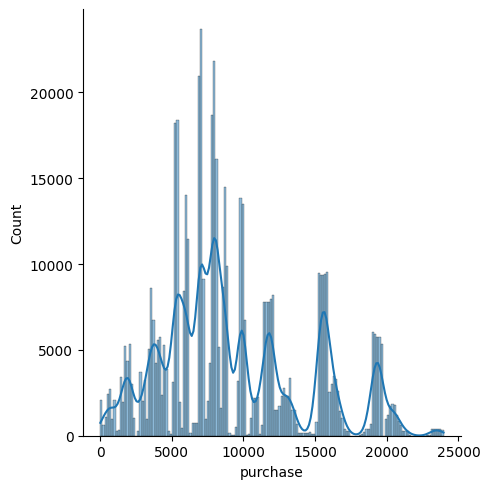

In [12]:
# plot the distribution of purchase

sns.displot(df['purchase'], kde = True)

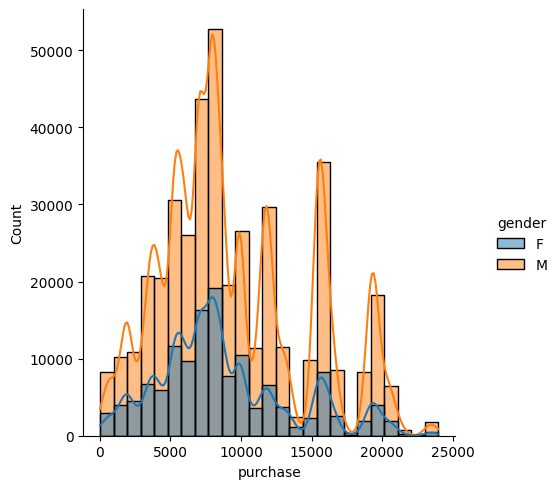

In [26]:
sns.displot(x='purchase',hue='gender',bins=25, data=df, kde=True)

In [15]:
# analysis wrto gender 
df["gender"].value_counts(normalize=True)

M    0.753105
F    0.246895
Name: gender, dtype: float64

In [16]:
df.columns

Index(['user_id', 'product_id', 'gender', 'age', 'occupation', 'city_category',
       'stay_in_current_city_years', 'marital_status', 'product_category',
       'purchase'],
      dtype='object')

In [17]:
df.groupby('gender')['purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
F,135809.0,8734.565765,4767.233289,12.0,5433.0,7914.0,11400.0,23959.0
M,414259.0,9437.526040,5092.186210,12.0,5863.0,8098.0,12454.0,23961.0


In [18]:
df.groupby('gender')['user_id'].nunique()

gender
F    1666
M    4225
Name: user_id, dtype: int64

<AxesSubplot: xlabel='gender', ylabel='purchase'>

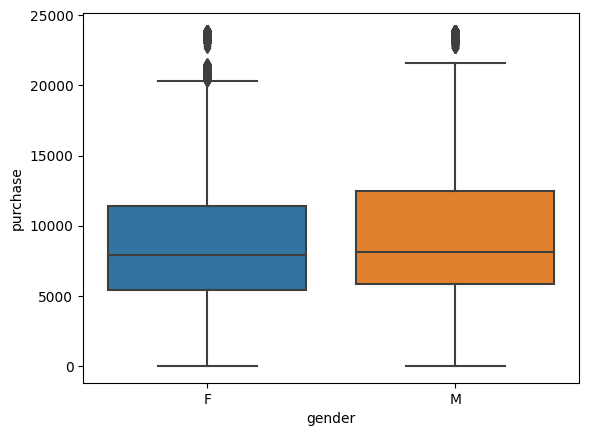

In [19]:
sns.boxplot(x = 'gender', y = 'purchase', data = df)

In [22]:
# median of both the genders are same from the box plot

In [21]:
df.groupby('age')['purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
age,,,,,,,,
0-17,15102.0,8933.464640,5111.114046,12.0,5328.0,7986.0,11874.0,23955.0
18-25,99660.0,9169.663606,5034.321997,12.0,5415.0,8027.0,12028.0,23958.0
26-35,219587.0,9252.690633,5010.527303,12.0,5475.0,8030.0,12047.0,23961.0
36-45,110013.0,9331.350695,5022.923879,12.0,5876.0,8061.0,12107.0,23960.0
46-50,45701.0,9208.625697,4967.216367,12.0,5888.0,8036.0,11997.0,23960.0
51-55,38501.0,9534.808031,5087.368080,12.0,6017.0,8130.0,12462.0,23960.0
55+,21504.0,9336.280459,5011.493996,12.0,6018.0,8105.5,11932.0,23960.0


<AxesSubplot: xlabel='age', ylabel='purchase'>

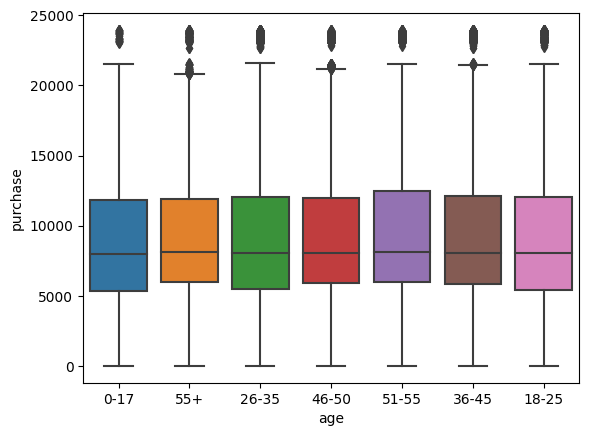

In [20]:
# the idea is to analyze purchase behavior based on age , gender and marital status
sns.boxplot(x = 'age', y = 'purchase', data = df)

In [23]:
# from the boxplot the median of age vs purchase is quite similar

df.groupby('marital_status')['purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
marital_status,,,,,,,,
0,324731.0,9265.907619,5027.347859,12.0,5605.0,8044.0,12061.0,23961.0
1,225337.0,9261.174574,5016.897378,12.0,5843.0,8051.0,12042.0,23961.0


<AxesSubplot: xlabel='marital_status', ylabel='purchase'>

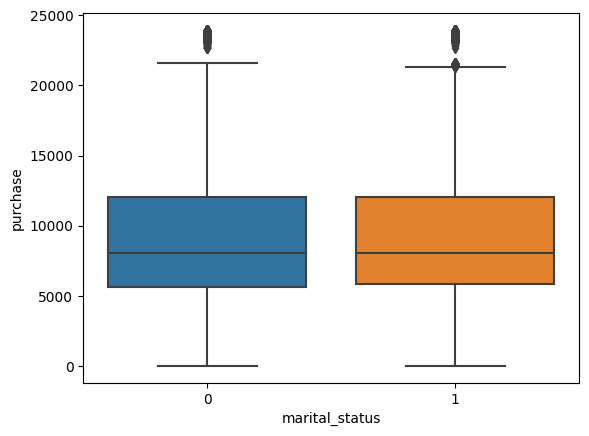

In [24]:
sns.boxplot(x = 'marital_status', y = 'purchase', data = df)

Uni-variate analysis

In [29]:
# which user purchased the most during Black Friday
df["user_id"].value_counts()[:10]

C:\Users\mahik\AppData\Local\Temp\ipykernel_27744\2874210406.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  df["user_id"].value_counts()[:10]


1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
1003618     767
1001150     752
1001015     740
1005795     729
1005831     727
Name: user_id, dtype: int64

In [30]:
# total sale vlaue of 1001680 

df[df["user_id"] == 1001680]["purchase"].sum()

8699596

In [32]:
# total sale value of entire 

df["purchase"].sum()

5095812742

<AxesSubplot: >

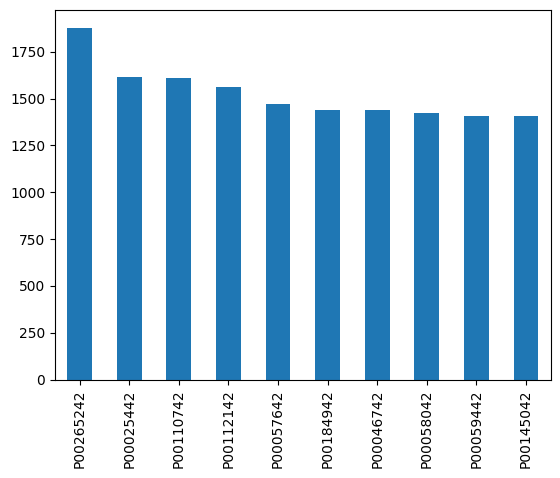

In [34]:
# most sold products and plot barplot 

df["product_id"].value_counts()[:10].plot.bar()

# most sold is P00025442

In [35]:
df.columns

Index(['user_id', 'product_id', 'gender', 'age', 'occupation', 'city_category',
       'stay_in_current_city_years', 'marital_status', 'product_category',
       'purchase'],
      dtype='object')

In [36]:
df.groupby('city_category')['purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
city_category,,,,,,,,
A,147720.0,8911.939216,4892.115238,12.0,5403.0,7931.0,11786.0,23961.0
B,231173.0,9151.300563,4955.496566,12.0,5460.0,8005.0,11986.0,23960.0
C,171175.0,9719.920993,5189.465121,12.0,6031.5,8585.0,13197.0,23961.0


<AxesSubplot: xlabel='city_category', ylabel='purchase'>

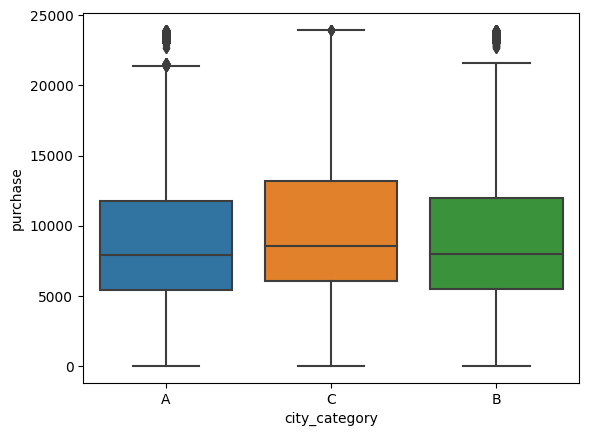

In [37]:
sns.boxplot(x = 'city_category', y = 'purchase', data = df)

In [38]:
# count plot for all the catogery variables under sub plots 
df.columns

Index(['user_id', 'product_id', 'gender', 'age', 'occupation', 'city_category',
       'stay_in_current_city_years', 'marital_status', 'product_category',
       'purchase'],
      dtype='object')

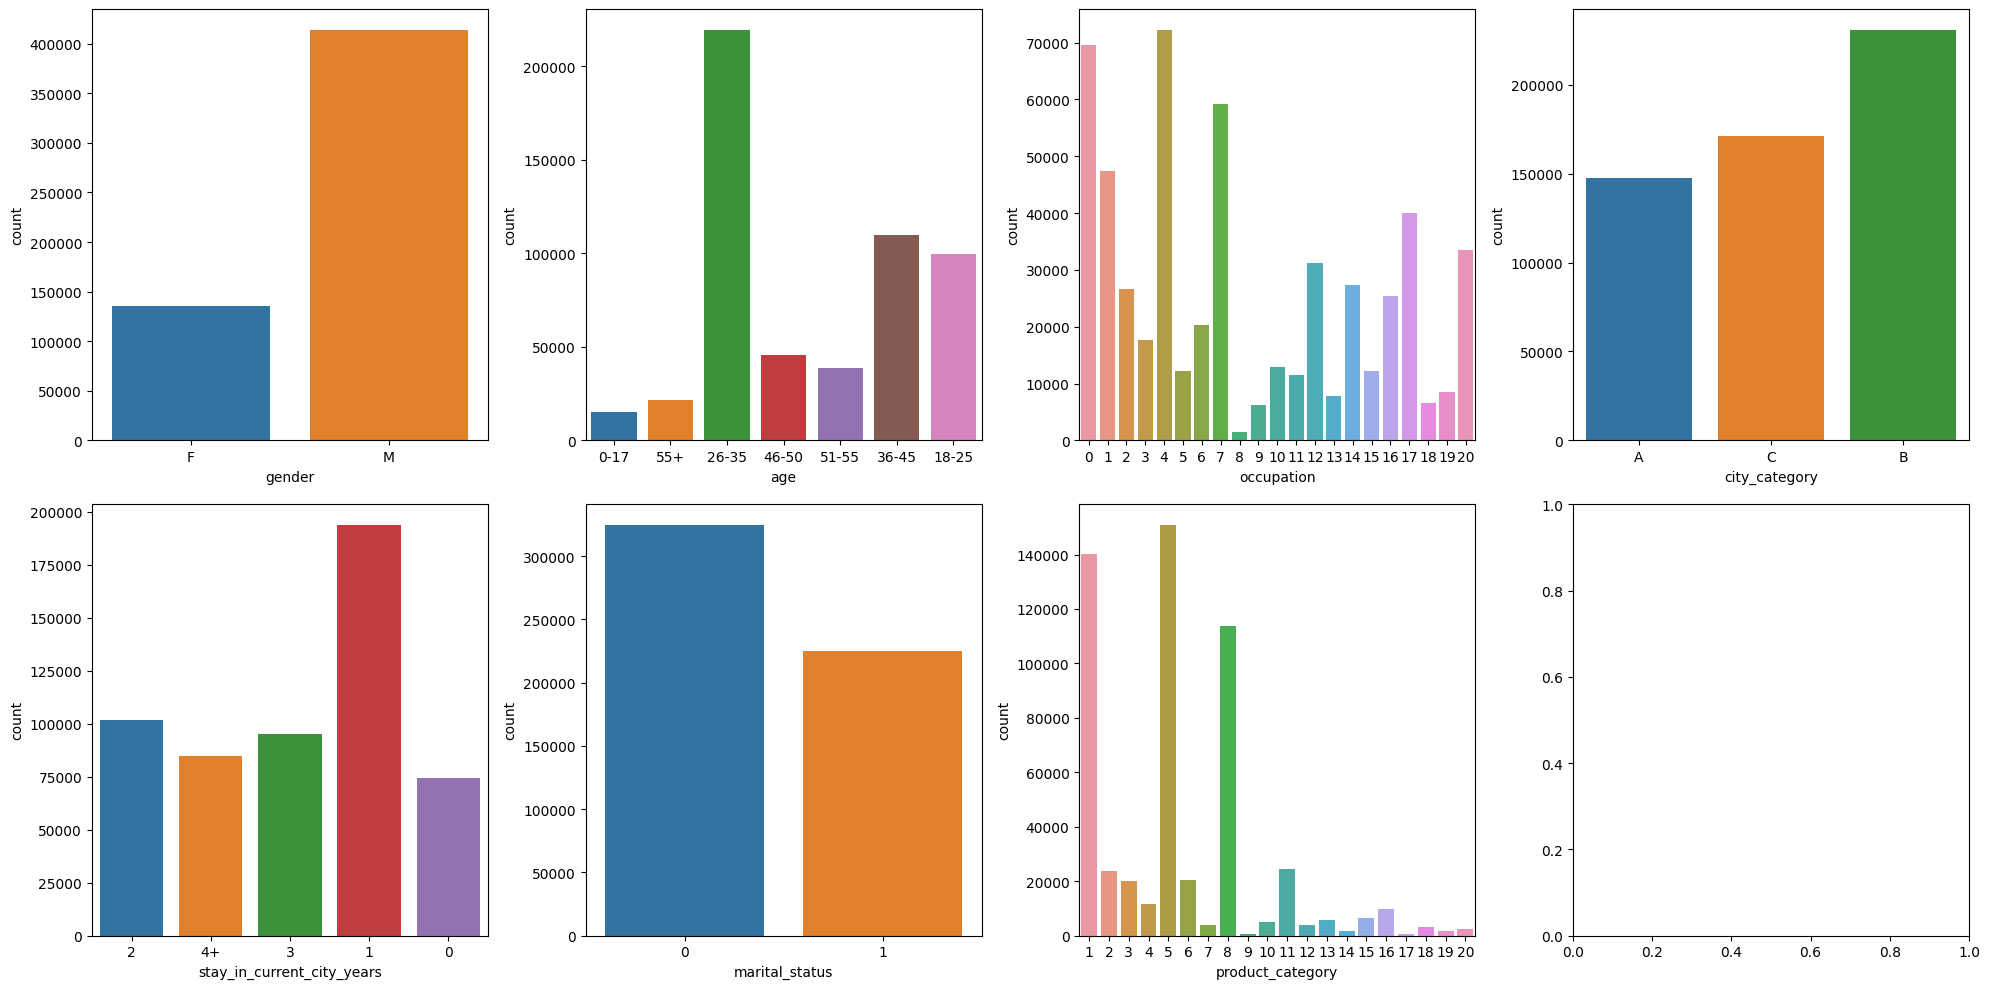

In [39]:
cols = ['gender', 'age', 'occupation', 'city_category','stay_in_current_city_years', 'marital_status', 'product_category']



fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

for i, col in enumerate(cols):
    sns.countplot(data=df, x=col, ax=axes[i//4, i%4])

plt.tight_layout()
plt.show()
     

From the cat.variables vs purchases we observed that : 

**Median** data for all the variables ['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years'] vs **purchase**, we  could see that the median [50 %] falls in around 7500 to 8000 which is quite  interesting.

Multi-variate analysis :

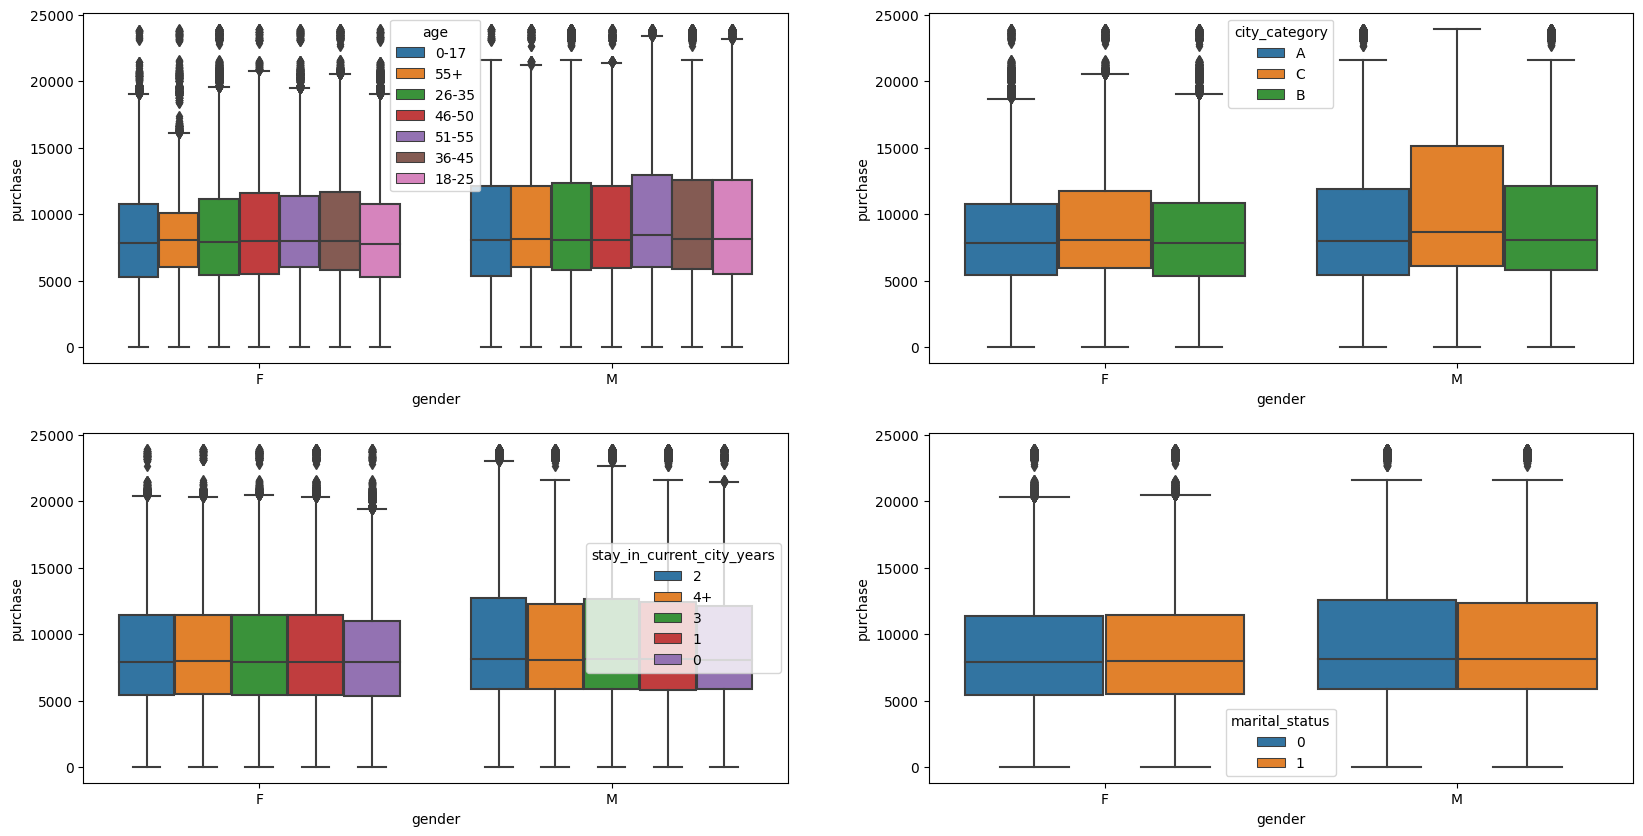

In [42]:
# gender and all other varibles vs purchase  

cols = ['age', 'city_category','stay_in_current_city_years', 'marital_status']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))

for i, col in enumerate(cols):
    sns.boxplot(data=df, x='gender',y='purchase',hue=col, ax=axes[i//2, i%2])

plt.show()
     


From the above box plot we could see that the irrespective of gender and all other variables the median purchase remained the same.

In [43]:
df.shape

(550068, 10)

From visual analysis we could observe that the median purchase value is same for both the genders

Let's try CLT to test the hypothesis :

Male vs female purchases


In [44]:
# get only male 

sample_size = 500 
total_samples = 1200


male_sample_purchase = [df[df['gender'] == 'M'].sample(n = sample_size, replace = True)["purchase"].mean() for i in range(total_samples)]
female_sample_purchase = [df[df['gender'] == 'F'].sample(n = sample_size, replace = True)["purchase"].mean() for i in range(total_samples)]

In [47]:
# given male data mean 
print("total_male_data_mean = ", df[df['gender'] == 'M']["purchase"].mean())

print("male_sample_purchase_mean = ", np.array(male_sample_purchase).mean())

total_male_data_mean =  9437.526040472265
male_sample_purchase_mean =  9443.121449999999


In [48]:
print("total_female_data_mean = ", df[df['gender'] == 'F']["purchase"].mean())

print("female_sample_purchase_mean = ", np.array(female_sample_purchase).mean())

total_female_data_mean =  8734.565765155476
female_sample_purchase_mean =  8725.113058333332


As we can see from the above that the sample distribution of sample mean is close to the given population mean for both male and female which tellss us that central limit theorem holds. Now let's check the distribution for both male samples and female samples.

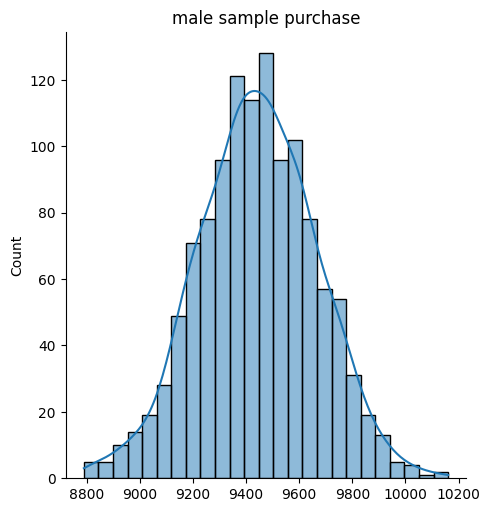

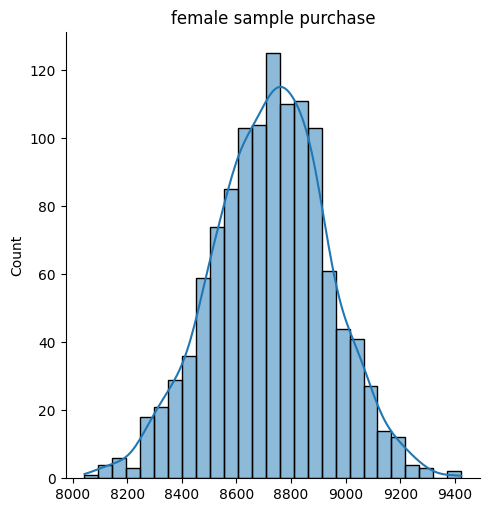

In [54]:
sns.displot(male_sample_purchase, kde = True)
plt.title("male sample purchase")
sns.displot(female_sample_purchase, kde = True)
plt.title("female sample purchase")
plt.show()
